In [ ]:
"""
Copyright © 2021-2022 The Johns Hopkins University Applied Physics Laboratory LLC

Permission is hereby granted, free of charge, to any person obtaining a copy 
of this software and associated documentation files (the “Software”), to 
deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or 
sell copies of the Software, and to permit persons to whom the Software is 
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in 
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR 
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, 
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE 
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, 
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR 
IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""

In [22]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from l2metrics.metrics_parser import MetricsParser
from matplotlib import pyplot as plt

sns.set_style("dark")
%matplotlib ipympl

In [23]:
base_path = Path("../examples/evaluation_results/")

json_path = base_path / "ll_metrics.json"
json_parser = MetricsParser(json_path)

regime_tsv_path = base_path / "ll_metrics_regime.tsv"
regime_tsv_parser = MetricsParser(regime_tsv_path, tsv=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
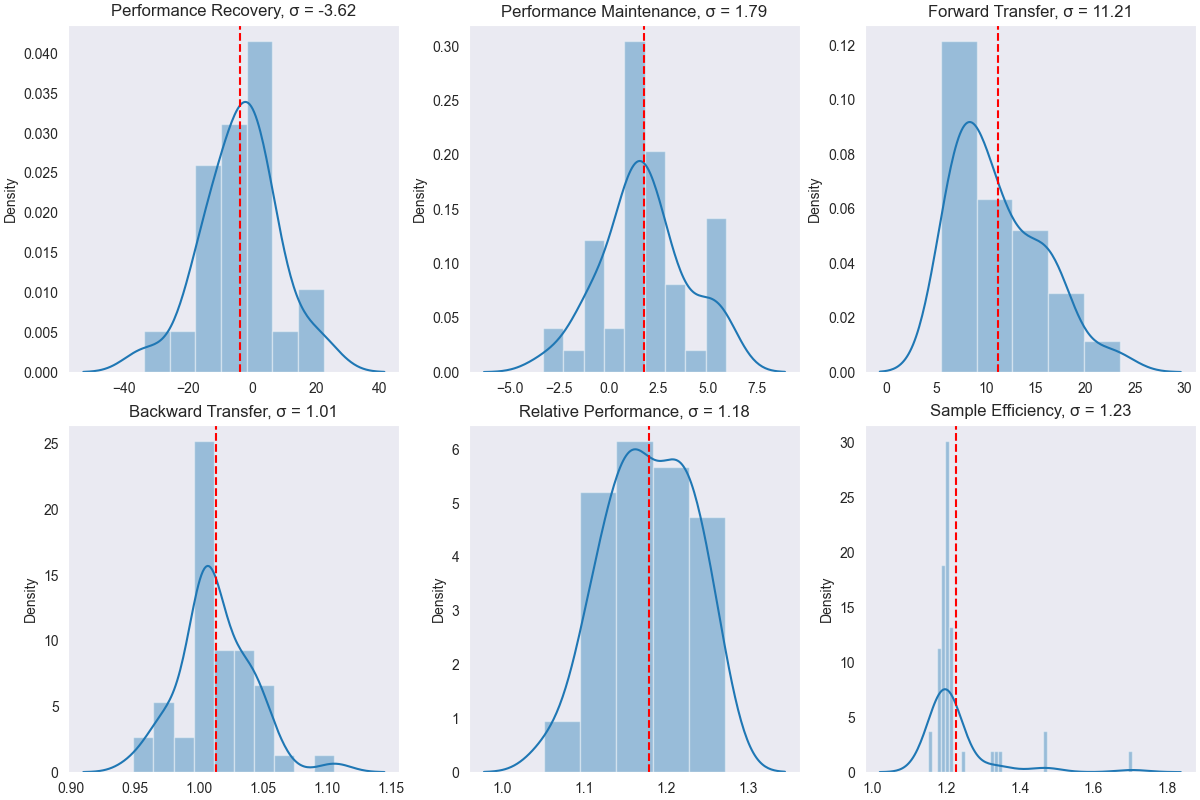

In [24]:
json_parser.plot_l2metrics_dist()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
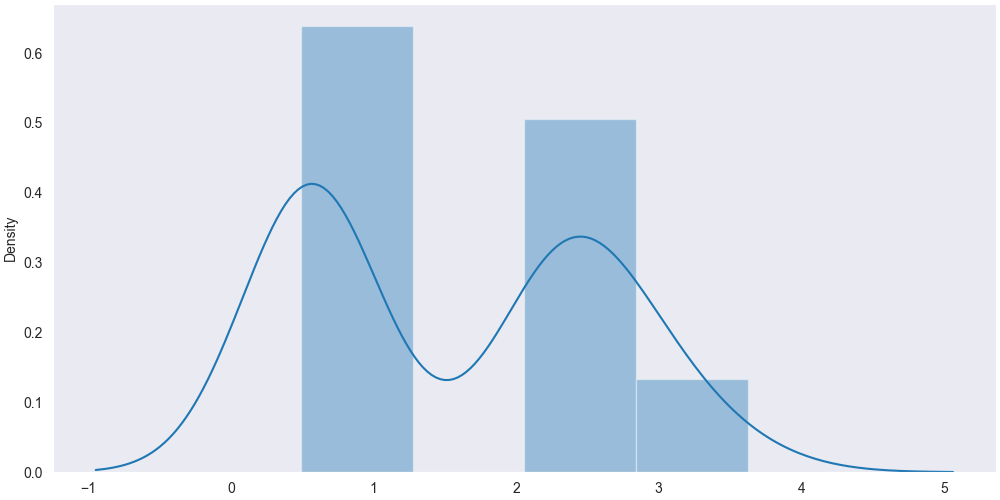

In [25]:
json_parser.plot_runtime("dist")

In [26]:
regime_tsv_parser.get_tsv_task_names()

['tc_2', 'tc_1', 'tb_1', 'ta_2', 'tb_2', 'ta_1']

In [27]:
regime_tsv_parser.df_tsv

,sg_name,agent_config,run_id,block_num,block_type,block_subtype,task_name,regime_num,task_params,saturation,eps_to_sat,term_perf,eps_to_term_perf
0,eval,agent_config,3-high_condensed-1625259873-5291016,0,test,wake,tc_2,0,"{""name"": ""TC_2"", ""min_per...",1.000000,0,1.000000,10
1,eval,agent_config,3-high_condensed-1625259873-5291016,0,test,wake,tc_1,1,"{""name"": ""TC_1"", ""min_per...",1.000000,0,1.000000,10
2,eval,agent_config,3-high_condensed-1625259873-5291016,0,test,wake,tb_1,2,"{""name"": ""TB_1"", ""min_per...",1.000000,0,1.000000,10
3,eval,agent_config,3-high_condensed-1625259873-5291016,0,test,wake,ta_2,3,"{""name"": ""TA_2"", ""min_per...",1.642763,0,1.642763,10
4,eval,agent_config,3-high_condensed-1625259873-5291016,0,test,wake,tb_2,4,"{""name"": ""TB_2"", ""min_per...",1.000000,0,1.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,eval,agent_config,3-high_dispersed-1625261459-667547,36,test,wake,ta_1,355,"{""name"": ""TA_1"", ""min_per...",93.970044,0,93.970044,10
9788,eval,agent_config,3-high_dispersed-1625261459-667547,36,test,wake,tb_2,356,"{""name"": ""TB_2"", ""min_per...",100.999616,0,100.999616,10
9789,eval,agent_config,3-high_dispersed-1625261459-667547,36,test,wake,tc_1,357,"{""name"": ""TC_1"", ""min_per...",100.976747,0,100.976747,10
9790,eval,agent_config,3-high_dispersed-1625261459-667547,36,test,wake,tc_2,358,"{""name"": ""TC_2"", ""min_per...",101.000000,0,101.000000,10
